In [1]:
%autosave 5

Autosaving every 5 seconds


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
planets = pd.read_csv('planets.csv')

In [5]:
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [6]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [11]:
planets['number'][0]/planets['mass'][0]

0.14084507042253522

In [13]:
planets['mass'][0]

7.1

In [15]:
planets['number'][0].astype(float)

1.0

In [17]:
planets['mass'][0].astype(int)

7

In [19]:
planets['year'][0].astype(str)

'2006'

In [20]:
planets['year_dt'] = pd.to_datetime(planets['year'],
                                    format='%Y')
planets.head()

,method,number,orbital_period,mass,distance,year,year_dt
0,Radial Velocity,1,269.300,7.10,77.40,2006,2006-01-01
1,Radial Velocity,1,874.774,2.21,56.95,2008,2008-01-01
2,Radial Velocity,1,763.000,2.60,19.84,2011,2011-01-01
3,Radial Velocity,1,326.030,19.40,110.62,2007,2007-01-01
4,Radial Velocity,1,516.220,10.50,119.47,2009,2009-01-01


In [34]:
names = pd.Series([
    'Pomeray; CODY ', ' Wagner; Jarry', 'smith; Ray'
])

In [25]:
names

0    Pomeray; CODY 
1     Wagner; Jarry
2        smith; Ray
dtype: object

In [35]:
names.str.replace(';', ',')

0    Pomeray, CODY 
1     Wagner, Jarry
2        smith, Ray
dtype: object

In [36]:
names.str.len()

0    14
1    14
2    10
dtype: int64

In [38]:
names = names.str.strip()
names

0    Pomeray; CODY
1    Wagner; Jarry
2       smith; Ray
dtype: object

In [39]:
names = names.str.lower()

In [40]:
names

0    pomeray; cody
1    wagner; jarry
2       smith; ray
dtype: object

In [42]:
names.str.upper()

0    POMERAY; CODY
1    WAGNER; JARRY
2       SMITH; RAY
dtype: object

In [43]:
names

0    pomeray; cody
1    wagner; jarry
2       smith; ray
dtype: object

In [45]:
names = names.str.split(', ')

In [46]:
names

0    [pomeray; cody]
1    [wagner; jarry]
2       [smith; ray]
dtype: object

In [48]:
names = pd.Series([i[::-1] for i in names])

In [49]:
names

0    [pomeray; cody]
1    [wagner; jarry]
2       [smith; ray]
dtype: object

In [50]:
[' '.join(i) for i in names]

['pomeray; cody', 'wagner; jarry', 'smith; ray']

In [63]:
daterange = pd.period_range('1/1/2020', 
                            freq='30d', 
                            periods=4)
daterange

PeriodIndex(['2020-01-01', '2020-01-31', '2020-03-01', '2020-03-31'], dtype='period[30D]', freq='30D')

In [54]:
pd.period_range('1/1/2022',
                freq='15d',
                periods=5)

PeriodIndex(['2022-01-01', '2022-01-16', '2022-01-31', '2022-02-15',
             '2022-03-02'],
            dtype='period[15D]', freq='15D')

In [65]:
date_df = pd.DataFrame(data=daterange,
                       columns=['sample date'])
date_df

,sample date
0,2020-01-01
1,2020-01-31
2,2020-03-01
3,2020-03-31


In [66]:
date_df['date difference'] = date_df['sample date'].diff(periods=1)
date_df

,sample date,date difference
0,2020-01-01,NaT
1,2020-01-31,<30 * Days>
2,2020-03-01,<30 * Days>
3,2020-03-31,<30 * Days>


In [67]:
date_df['first of month'] = date_df['sample date'].values.astype('datetime64[M]')
date_df

,sample date,date difference,first of month
0,2020-01-01,NaT,2020-01-01
1,2020-01-31,<30 * Days>,2020-01-01
2,2020-03-01,<30 * Days>,2020-03-01
3,2020-03-31,<30 * Days>,2020-03-01


In [60]:
date_df

,sample date,date difference,first of month
0,2020-01-01,NaT,2020-01-01
1,2020-01-31,<30 * Days>,2020-01-01
2,2020-03-01,<30 * Days>,2020-03-01
3,2020-03-31,<30 * Days>,2020-03-01
4,2020-04-30,<30 * Days>,2020-04-01
5,2020-05-30,<30 * Days>,2020-05-01
6,2020-06-29,<30 * Days>,2020-06-01
7,2020-07-29,<30 * Days>,2020-07-01
8,2020-08-28,<30 * Days>,2020-08-01
9,2020-09-27,<30 * Days>,2020-09-01


In [68]:
date_df.dtypes

sample date           period[30D]
date difference            object
first of month     datetime64[ns]
dtype: object

In [70]:
date_df['sample date'] = date_df['sample date'].dt.to_timestamp()
date_df.dtypes

sample date        datetime64[ns]
date difference            object
first of month     datetime64[ns]
dtype: object

In [71]:
date_df['sample date'] - date_df['first of month']

0    0 days
1   30 days
2    0 days
3   30 days
dtype: timedelta64[ns]

In [73]:
date_df['sample date']

0   2020-01-01
1   2020-01-31
2   2020-03-01
3   2020-03-31
Name: sample date, dtype: datetime64[ns]

In [72]:
date_df['sample date'] - pd.Timedelta('30 d')

0   2019-12-02
1   2020-01-01
2   2020-01-31
3   2020-03-01
Name: sample date, dtype: datetime64[ns]

In [75]:
date_df['sample date'].dt.day_name()

0    Wednesday
1       Friday
2       Sunday
3      Tuesday
Name: sample date, dtype: object

In [119]:
years = []
for year in range(1995, 2050):
    years.append(f'7, 1, {year}')
    
df = pd.DataFrame({'birthdate': years})
df['birthdate'] = df['birthdate'].astype('datetime64[ns]')
df['day-name'] = df['birthdate'].dt.day_name()
# df.dtypes
# df['day-name'].unique()
df[df['day-name'] == 'Friday']

,birthdate,day-name
10,2005-07-01,Friday
16,2011-07-01,Friday
21,2016-07-01,Friday
27,2022-07-01,Friday
38,2033-07-01,Friday
44,2039-07-01,Friday
49,2044-07-01,Friday


In [111]:
(df['birthdate'] - pd.Timedelta('30 d')).head()

0   1995-06-01
1   1996-06-01
2   1997-06-01
3   1998-06-01
4   1999-06-01
Name: birthdate, dtype: datetime64[ns]

In [120]:
df.head()

,birthdate,day-name
0,1995-07-01,Saturday
1,1996-07-01,Monday
2,1997-07-01,Tuesday
3,1998-07-01,Wednesday
4,1999-07-01,Thursday


In [130]:
df[df['day-name'] == 'Sunday']

,birthdate,day-name
6,2001-07-01,Sunday
12,2007-07-01,Sunday
17,2012-07-01,Sunday
23,2018-07-01,Sunday
34,2029-07-01,Sunday
40,2035-07-01,Sunday
45,2040-07-01,Sunday
51,2046-07-01,Sunday


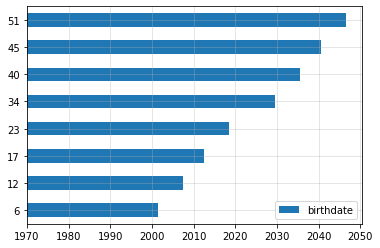

In [136]:
df[df['day-name'] == 'Sunday'].plot(kind='barh')
plt.grid(alpha=0.4)

In [155]:
def search_birthdate_by_year(year):
    return df[
        df['birthdate'].astype(str).str.contains(str(year))]

search_birthdate_by_year(2010)

,birthdate,day-name
15,2010-07-01,Thursday


In [157]:
def search_birthdate_by_week_name(week_name):
    return df[df['day-name'] == week_name]

search_birthdate_by_week_name('Friday')

,birthdate,day-name
10,2005-07-01,Friday
16,2011-07-01,Friday
21,2016-07-01,Friday
27,2022-07-01,Friday
38,2033-07-01,Friday
44,2039-07-01,Friday
49,2044-07-01,Friday
